In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px


In [58]:
df220423=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220423.csv')
df220430=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220430.csv')
df220507=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220507.csv')
df220514=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220514.csv')
df220521=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220521.csv')
df220528=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220528.csv')
df220604=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220604.csv')
df220611=pd.read_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/turnstile_220611.csv')

df_raw= pd.concat([df220423,df220430,df220507,df220514,df220521,df220528,df220604,df220611])
df_raw.to_csv('C:/Users/mehmet/Documents/1_IST_DATA_SCI_ACA/1_proje/data/df_raw_all.csv',index=False)

In [59]:
df_raw.shape

(1689579, 11)

In [60]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689579 entries, 0 to 211246
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1689579 non-null  object
 1   UNIT                                                                  1689579 non-null  object
 2   SCP                                                                   1689579 non-null  object
 3   STATION                                                               1689579 non-null  object
 4   LINENAME                                                              1689579 non-null  object
 5   DIVISION                                                              1689579 non-null  object
 6   DATE                                                                  1689579 non-n

In [61]:
df_raw.duplicated().sum()

0

In [62]:
df_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [63]:
df_raw.rename(columns={df_raw.columns[10]:'EXITS'},inplace=True)

In [64]:
df_raw.nunique()

C/A             753
UNIT            470
SCP             224
STATION         379
LINENAME        114
DIVISION          6
DATE             56
TIME          44352
DESC              2
ENTRIES     1226076
EXITS       1180175
dtype: int64

In [65]:
df_raw

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,00:00:00,REGULAR,7702257,2693154
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,04:00:00,REGULAR,7702260,2693158
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,08:00:00,REGULAR,7702266,2693179
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,12:00:00,REGULAR,7702282,2693270
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2022,16:00:00,REGULAR,7702325,2693324
...,...,...,...,...,...,...,...,...,...,...,...
211242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,05:00:00,REGULAR,0,488
211243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,09:00:00,REGULAR,0,488
211244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,13:00:00,REGULAR,0,489
211245,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/10/2022,17:00:00,REGULAR,0,490


In [66]:
df_raw['TURNSTILE']=df_raw['C/A']+' '+df_raw['UNIT']+' '+df_raw['SCP']
df_raw['DATETIME']=df_raw['DATE']+' '+df_raw['TIME']

In [67]:
df_raw.sort_values(by=["TURNSTILE",'DATETIME'],inplace=True) 

In [68]:
df_raw['DATE']=pd.to_datetime(df_raw['DATE'].astype(str), format='%m/%d/%Y') #chaging date format, define date format via format=''

In [69]:
df_raw.drop(columns='C/A',axis=1,inplace=True)
df_raw.drop(columns='UNIT',axis=1,inplace=True)
df_raw.drop(columns='SCP',axis=1,inplace=True)
df_raw.drop(columns='DATETIME',axis=1,inplace=True)

In [70]:
df_raw['DAY'] = df_raw['DATE'].dt.day_name() # getting day name of date

In [71]:
df_raw

,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DAY
0,59 ST,NQR456W,BMT,2022-04-16,00:00:00,REGULAR,7702257,2693154,A002 R051 02-00-00,Saturday
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,REGULAR,7702260,2693158,A002 R051 02-00-00,Saturday
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,REGULAR,7702266,2693179,A002 R051 02-00-00,Saturday
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,REGULAR,7702282,2693270,A002 R051 02-00-00,Saturday
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,REGULAR,7702325,2693324,A002 R051 02-00-00,Saturday
...,...,...,...,...,...,...,...,...,...,...
211242,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,REGULAR,0,488,TRAM2 R469 00-05-01,Friday
211243,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,REGULAR,0,488,TRAM2 R469 00-05-01,Friday
211244,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,REGULAR,0,489,TRAM2 R469 00-05-01,Friday
211245,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,REGULAR,0,490,TRAM2 R469 00-05-01,Friday


In [72]:
df_raw.DESC.value_counts()

REGULAR       1682691
RECOVR AUD       6888
Name: DESC, dtype: int64

In [73]:
df_raw=df_raw[df_raw['DESC']=='REGULAR'] # "RECOVR AUD" attributes has dropped. Rows' DESC is only REGULAR type.

In [74]:
df_raw.drop(columns='DESC',axis=1,inplace=True)

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\3828759546.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
df_raw.head()

,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,TURNSTILE,DAY
0,59 ST,NQR456W,BMT,2022-04-16,00:00:00,7702257,2693154,A002 R051 02-00-00,Saturday
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,7702260,2693158,A002 R051 02-00-00,Saturday
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,7702266,2693179,A002 R051 02-00-00,Saturday
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,7702282,2693270,A002 R051 02-00-00,Saturday
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,7702325,2693324,A002 R051 02-00-00,Saturday


In [76]:
df_raw['DIFF.ENTRIES']=df_raw['ENTRIES'].diff()
df_raw['DIFF.EXITS']=df_raw['EXITS'].diff()
df_raw.drop(columns='ENTRIES',axis=1,inplace=True)
df_raw.drop(columns='EXITS',axis=1,inplace=True)

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\2615660028.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\2615660028.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\2615660028.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [77]:
df_raw

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAY,DIFF.ENTRIES,DIFF.EXITS
0,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-00-00,Saturday,NaN,NaN
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0
...,...,...,...,...,...,...,...,...,...
211242,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
211243,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
211244,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0
211245,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0


In [78]:
df_raw.drop(index=0, inplace=True) # The row has "NaN" has been dropped.

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\1090700148.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df_raw.head()

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAY,DIFF.ENTRIES,DIFF.EXITS
1,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0
2,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0
3,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0
4,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0
5,59 ST,NQR456W,BMT,2022-04-16,20:00:00,A002 R051 02-00-00,Saturday,56.0,44.0


##### There are three problems regarding the values in "DIFF.ENTRIES","DIFF.EXITS,"TRAFFIC" columns.
    - positive too much values
    - negative values 
    - some zero values  
    
If a passanger passes a turstile in 3 second, max. 4800 passangers can pass a turstile in 4-hours.

In [80]:
df_raw[ (df_raw['DIFF.ENTRIES'] < 0) | (df_raw['DIFF.EXITS'] < 0)] # negative values

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAY,DIFF.ENTRIES,DIFF.EXITS
42,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-00-01,Saturday,-905546.0,-1126217.0
84,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-00,Saturday,-5341071.0,4123185.0
126,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-01,Saturday,251689.0,-2971901.0
168,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-02,Saturday,-1619341.0,-2623527.0
252,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-04,Saturday,1376166.0,-3192512.0
...,...,...,...,...,...,...,...,...,...
210738,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-00-02,Saturday,-347872.0,129623.0
210780,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-05-00,Saturday,-450472.0,-142811.0
210910,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-03-00,Saturday,-3308134.0,-26774.0
210998,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-05-00,Saturday,-2881567.0,-402452.0


In [81]:
df_raw[ (df_raw['DIFF.ENTRIES'] > 4800) | (df_raw['DIFF.EXITS'] > 4800)] # too much number of passangers

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAY,DIFF.ENTRIES,DIFF.EXITS
84,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-00,Saturday,-5341071.0,4123185.0
126,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-01,Saturday,251689.0,-2971901.0
210,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-03,Saturday,6088392.0,6863120.0
252,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-04,Saturday,1376166.0,-3192512.0
294,59 ST,NQR456W,BMT,2022-04-16,00:00:00,A002 R051 02-03-05,Saturday,4687242.0,-2519705.0
...,...,...,...,...,...,...,...,...,...
210654,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-00-00,Saturday,1345260.0,30186.0
210738,RIT-MANHATTAN,R,RIT,2022-04-16,01:00:00,TRAM1 R468 00-00-02,Saturday,-347872.0,129623.0
210822,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-00-00,Saturday,1115858.0,28716.0
210866,RIT-ROOSEVELT,R,RIT,2022-04-16,01:00:00,TRAM2 R469 00-00-01,Saturday,2836495.0,27695.0


In [82]:
df=df_raw[((df_raw['DIFF.ENTRIES']>=0) & (df_raw['DIFF.EXITS']>=0)) & ((df_raw['DIFF.ENTRIES']<=4880) & (df_raw['DIFF.EXITS']<=4880))]
print("Raw Data Rows:",df_raw.shape[0])
print("Extracted Data Rows:",df.shape[0])
print("Eliminated Data Rows:",df_raw.shape[0]-df.shape[0])
print("Elimineted Rows (%):",(100-(df.shape[0]/df_raw.shape[0]*100)))

Raw Data Rows: 1682683
Extracted Data Rows: 1657046
Eliminated Data Rows: 25637
Elimineted Rows (%): 1.5235787132811112


In [83]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df 

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\3937230691.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAY,DIFF.ENTRIES,DIFF.EXITS
0,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0
1,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0
2,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0
3,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0
4,59 ST,NQR456W,BMT,2022-04-16,20:00:00,A002 R051 02-00-00,Saturday,56.0,44.0
...,...,...,...,...,...,...,...,...,...
1657041,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1657042,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0
1657043,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0
1657044,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0


In [84]:
df['TRAFFIC']=df['DIFF.ENTRIES']+df['DIFF.EXITS']

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\3289938883.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df

,STATION,LINENAME,DIVISION,DATE,TIME,TURNSTILE,DAY,DIFF.ENTRIES,DIFF.EXITS,TRAFFIC
0,59 ST,NQR456W,BMT,2022-04-16,04:00:00,A002 R051 02-00-00,Saturday,3.0,4.0,7.0
1,59 ST,NQR456W,BMT,2022-04-16,08:00:00,A002 R051 02-00-00,Saturday,6.0,21.0,27.0
2,59 ST,NQR456W,BMT,2022-04-16,12:00:00,A002 R051 02-00-00,Saturday,16.0,91.0,107.0
3,59 ST,NQR456W,BMT,2022-04-16,16:00:00,A002 R051 02-00-00,Saturday,43.0,54.0,97.0
4,59 ST,NQR456W,BMT,2022-04-16,20:00:00,A002 R051 02-00-00,Saturday,56.0,44.0,100.0
...,...,...,...,...,...,...,...,...,...,...
1657041,RIT-ROOSEVELT,R,RIT,2022-06-10,05:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1657042,RIT-ROOSEVELT,R,RIT,2022-06-10,09:00:00,TRAM2 R469 00-05-01,Friday,0.0,0.0,0.0
1657043,RIT-ROOSEVELT,R,RIT,2022-06-10,13:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0,1.0
1657044,RIT-ROOSEVELT,R,RIT,2022-06-10,17:00:00,TRAM2 R469 00-05-01,Friday,0.0,1.0,1.0


In [86]:
division=df.groupby(by='DIVISION')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
linename=df.groupby(by='LINENAME')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
station=df.groupby(by='STATION')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
weekday=df.groupby(by='DAY')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()
time=df.groupby(by='TIME')['DIFF.ENTRIES','DIFF.EXITS','TRAFFIC'].sum()

division.sort_values(by='TRAFFIC',ascending=False,inplace=True)
linename.sort_values(by='TRAFFIC',ascending=False,inplace=True)
station.sort_values(by='TRAFFIC',ascending=False,inplace=True)
weekday.sort_values(by='TRAFFIC',ascending=False,inplace=True)
time.sort_values(by='TRAFFIC',ascending=False,inplace=True)


division.reset_index(inplace=True)
linename.reset_index(inplace=True)
station.reset_index(inplace=True)
weekday.reset_index(inplace=True)
time.reset_index(inplace=True)

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\941413095.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\941413095.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\941413095.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\941413095.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\mehmet\AppData\Local\Temp\ipykernel_11252\941413095.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [87]:
print(division.sort_values(by=['TRAFFIC'],ascending=False)[0:7])
print("Division Types:",df['DIVISION'].nunique(),"\n")
print(linename.sort_values(by=['TRAFFIC'],ascending=False)[0:7])
print("Linename Types:",df['LINENAME'].nunique(),"\n")
print(station.sort_values(by=['TRAFFIC'],ascending=False)[0:7])
print("Station Types:",df['STATION'].nunique(),"\n")
print(weekday.sort_values(by=['TRAFFIC'],ascending=False)[0:7],"\n")
print(time.sort_values(by=['TRAFFIC'],ascending=False)[0:7])

  DIVISION  DIFF.ENTRIES  DIFF.EXITS      TRAFFIC
0      IRT    45163207.0  61389544.0  106552751.0
1      IND    39584544.0  52266545.0   91851089.0
2      BMT    24081769.0  32380358.0   56462127.0
3      PTH     6646596.0   7381082.0   14027678.0
4      RIT      398148.0      8782.0     406930.0
5      SRT      245287.0        29.0     245316.0
Division Types: 6 

  LINENAME  DIFF.ENTRIES  DIFF.EXITS     TRAFFIC
0        1    13330441.0  15735184.0  29065625.0
1        6     6604333.0   9958575.0  16562908.0
2        7     6559428.0   8810106.0  15369534.0
3        F     3544407.0   4287812.0   7832219.0
4       25     3877067.0   3487131.0   7364198.0
5        L     2625369.0   4466915.0   7092284.0
6      123     2345846.0   3976328.0   6322174.0
Linename Types: 114 

           STATION  DIFF.ENTRIES  DIFF.EXITS    TRAFFIC
0   34 ST-PENN STA     2752021.0   4364833.0  7116854.0
1  GRD CNTRL-42 ST     2205249.0   3685393.0  5890642.0
2  34 ST-HERALD SQ     2052947.0   3355003.0  54

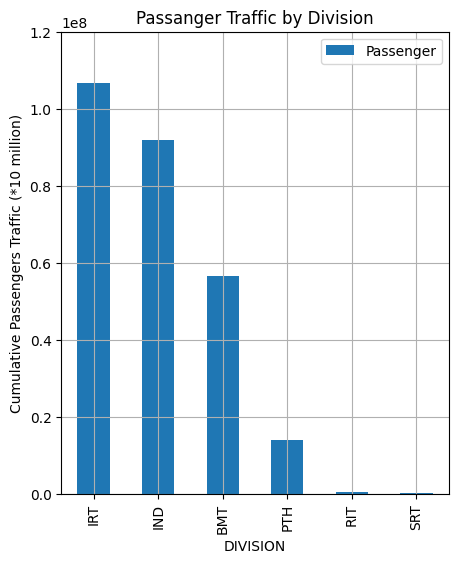

In [88]:
division.plot(
              kind="bar",
              x='DIVISION',y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (*10 million)',
              grid=True,
              ylim=(0,120000000),
              title='Passanger Traffic by Division',
              figsize=(5,6)
              )

plt.show()

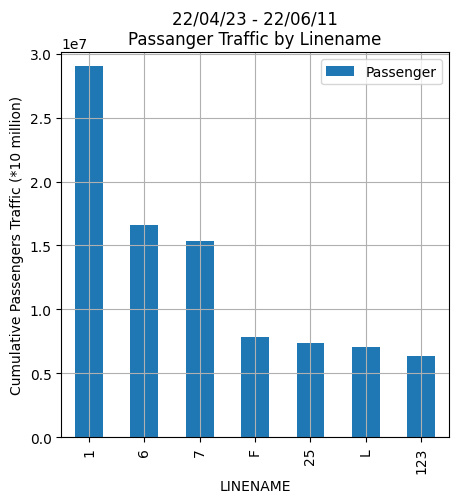

In [89]:
linename[0:7].plot(
              kind="bar",
              x="LINENAME",y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (*10 million)',
              grid=True,
              ylim=(0,30096227),
              title='22/04/23 - 22/06/11\nPassanger Traffic by Linename',
              figsize=(5,5)
                   )
plt.show()

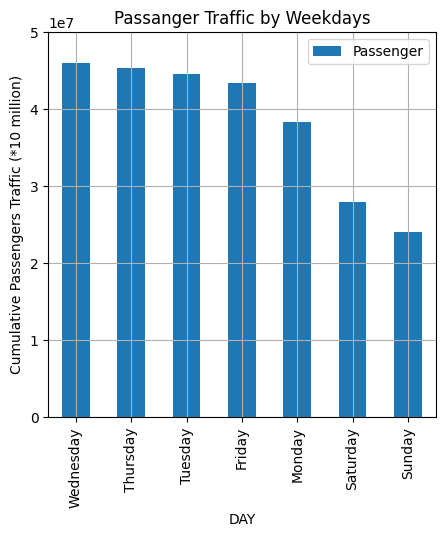

In [90]:
weekday.plot( 
              kind="bar",
              x="DAY",y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (*10 million)',
              grid=True,
              ylim=(0,50000000),
              title='Passanger Traffic by Weekdays',
              figsize=(5,5)
             )
plt.show()

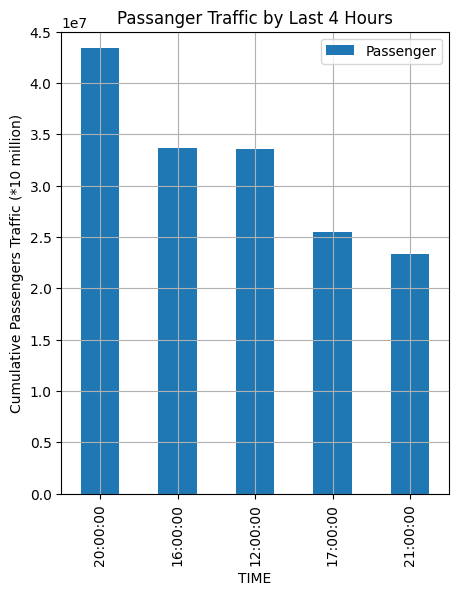

In [91]:
time[0:5].plot(kind="bar",
              x='TIME',y="TRAFFIC",
              label='Passenger',ylabel='Cumulative Passengers Traffic (*10 million)',
              grid=True,
              ylim=(0,45000000),
              title='Passanger Traffic by Last 4 Hours',
              figsize=(5,6))
plt.show()

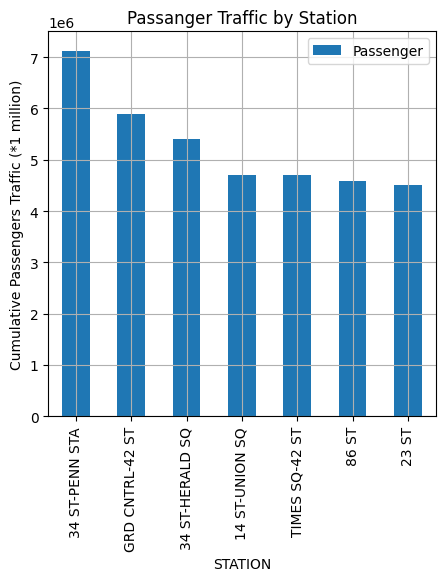

In [92]:
station[0:7].plot(
                  kind="bar",
                  x="STATION",y="TRAFFIC",
                  label='Passenger',ylabel='Cumulative Passengers Traffic (*1 million)',
                  grid=True,
                  ylim=(0,7500000),
                  title='Passanger Traffic by Station',
                  figsize=(5,5)
                 )
plt.show()

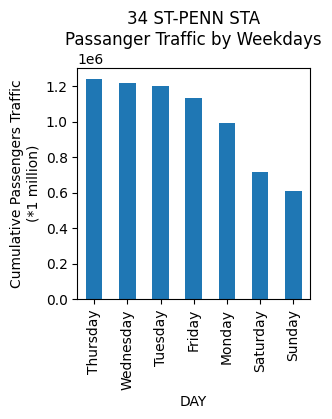

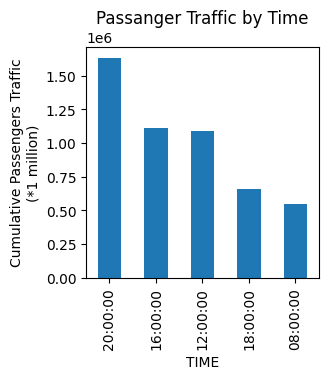

In [93]:
station1day=df[df['STATION']=='34 ST-PENN STA'].groupby(by='DAY')['TRAFFIC'].sum()
station1time=df[df['STATION']=='34 ST-PENN STA'].groupby(by='TIME')['TRAFFIC'].sum()
station1day.sort_values(ascending=False).plot(kind='bar',figsize=(3,3),ylabel='Cumulative Passengers Traffic\n(*1 million)',title='34 ST-PENN STA\nPassanger Traffic by Weekdays')
plt.show()
station1time.sort_values(ascending=False)[0:5].plot(kind='bar',figsize=(3,3),title='Passanger Traffic by Time',ylabel='Cumulative Passengers Traffic\n(*1 million)')
plt.show()


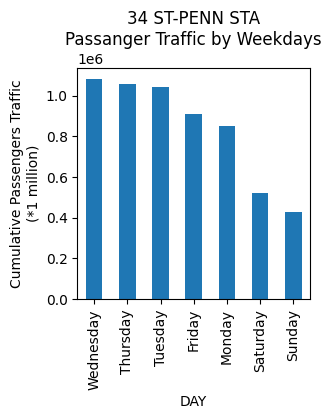

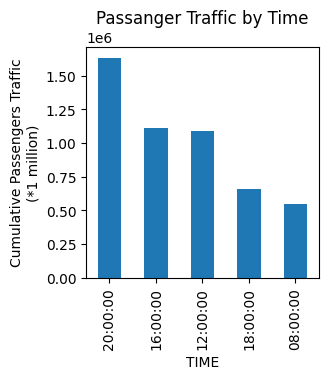

In [94]:
station2day=df[df['STATION']=='GRD CNTRL-42 ST'].groupby(by='DAY')['TRAFFIC'].sum()
station2time=df[df['STATION']=='GRD CNTRL-42 ST'].groupby(by='TIME')['TRAFFIC'].sum()
station2day.sort_values(ascending=False).plot(kind='bar',figsize=(3,3),ylabel='Cumulative Passengers Traffic\n(*1 million)',title='34 ST-PENN STA\nPassanger Traffic by Weekdays')
plt.show()
station1time.sort_values(ascending=False)[0:5].plot(kind='bar',figsize=(3,3),title='Passanger Traffic by Time',ylabel='Cumulative Passengers Traffic\n(*1 million)')
plt.show()

In [95]:
px.bar(
        data_frame=division,
        x='DIVISION',
        y='TRAFFIC',
        text_auto=True,
        title='Deneme Title',
        width=600, height=400
        )


fig = px.bar(df, x="DIVISION", y="TRAFFIC", color="LINENAME", title="TRAFFIC by DIVISION with each LINENAME")
fig.show()